Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



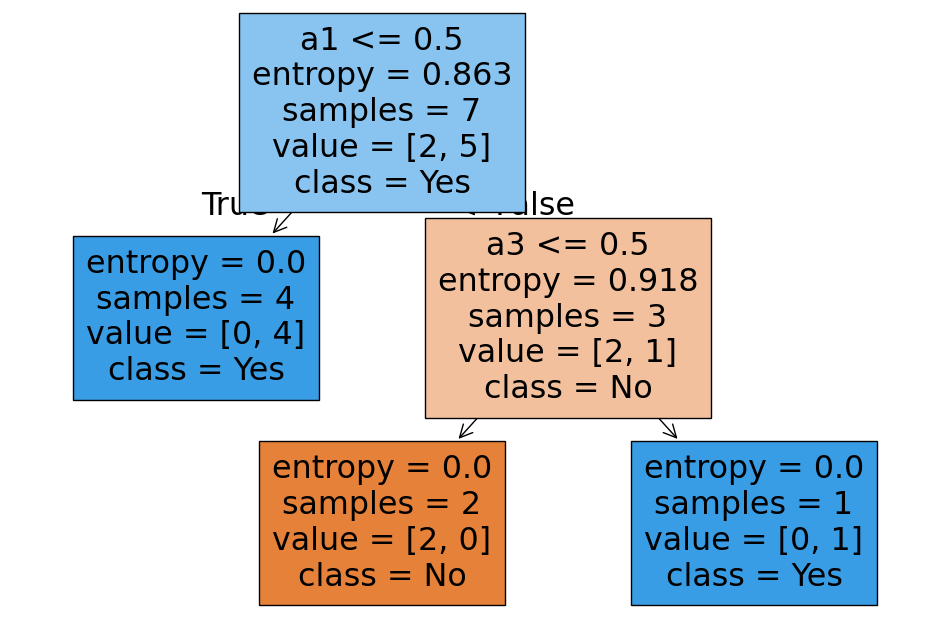

In [ ]:
                                                                                                                                                                                                                                                                                                                 # -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()



IRIS Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


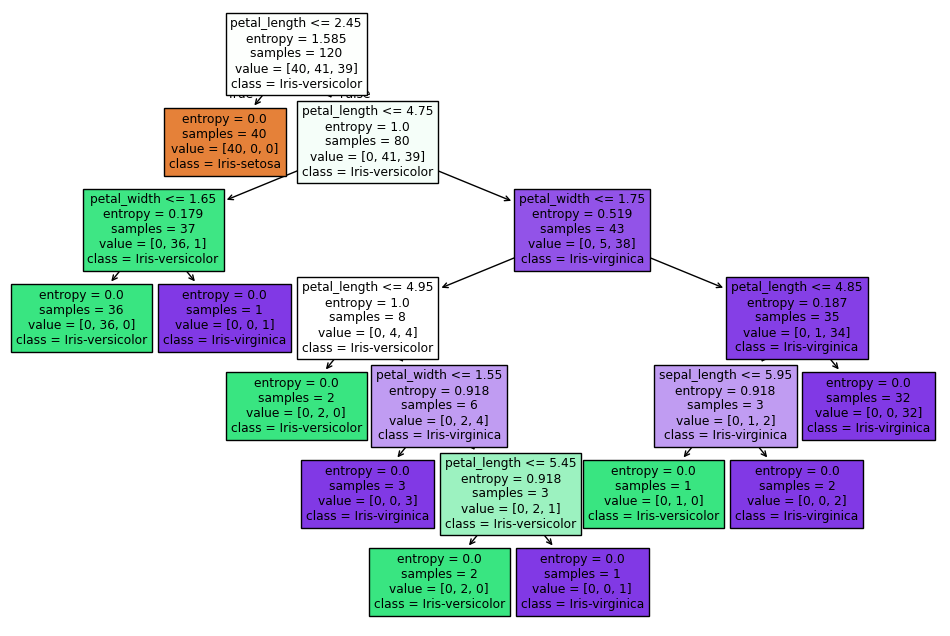


Drug Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


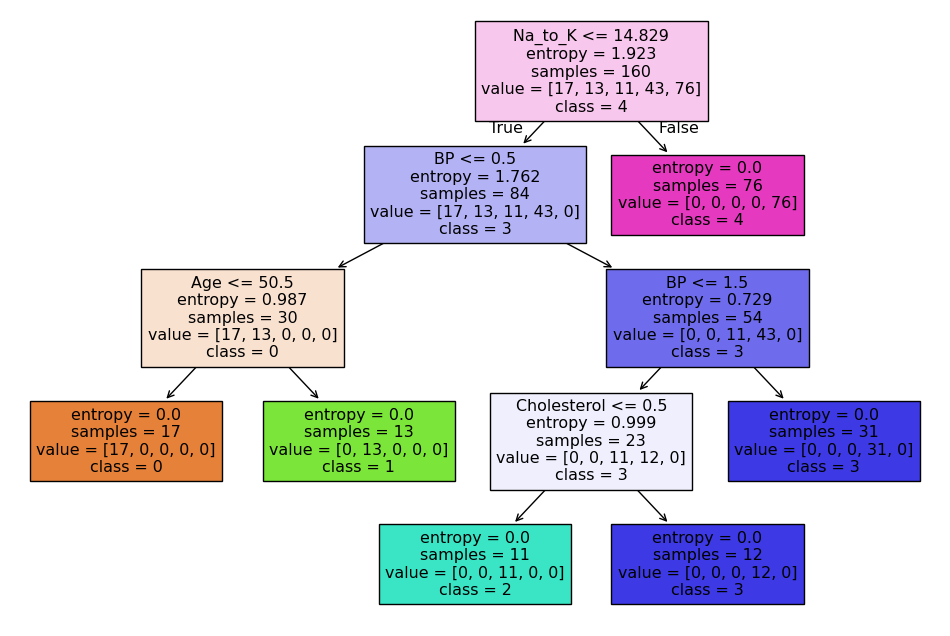

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load and process the IRIS dataset
iris = pd.read_csv("/content/iris.csv")
X_iris = iris.iloc[:, :-1]  # Features
y_iris = iris.iloc[:, -1]   # Target

# Encode target labels
label_encoder_iris = LabelEncoder()
y_iris = label_encoder_iris.fit_transform(y_iris)

# Split the dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train the DecisionTree model
clf_iris = DecisionTreeClassifier(criterion='entropy')
clf_iris.fit(X_train_iris, y_train_iris)

# Predict and evaluate
y_pred_iris = clf_iris.predict(X_test_iris)
print("IRIS Dataset:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_iris, filled=True, feature_names=X_iris.columns, class_names=label_encoder_iris.classes_)
plt.show()

# Load and process the Drug dataset
drug = pd.read_csv("/content/drug.csv")
X_drug = drug.iloc[:, :-1]  # Features
y_drug = drug.iloc[:, -1]   # Target

# Encode categorical features and target
label_encoders = {}
for column in X_drug.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_drug[column] = le.fit_transform(X_drug[column])
    label_encoders[column] = le

y_drug = LabelEncoder().fit_transform(y_drug)

# Split the dataset
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train the DecisionTree model
clf_drug = DecisionTreeClassifier(criterion='entropy')
clf_drug.fit(X_train_drug, y_train_drug)

# Predict and evaluate
y_pred_drug = clf_drug.predict(X_test_drug)
print("\nDrug Dataset:")
print("Accuracy:", accuracy_score(y_test_drug, y_pred_drug))
print("Confusion Matrix:\n", confusion_matrix(y_test_drug, y_pred_drug))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_drug, filled=True, feature_names=X_drug.columns, class_names=[str(i) for i in set(y_drug)])
plt.show()


Mean Absolute Error (MAE): 94.3
Mean Squared Error (MSE): 17347.7
Root Mean Squared Error (RMSE): 131.7106677532234


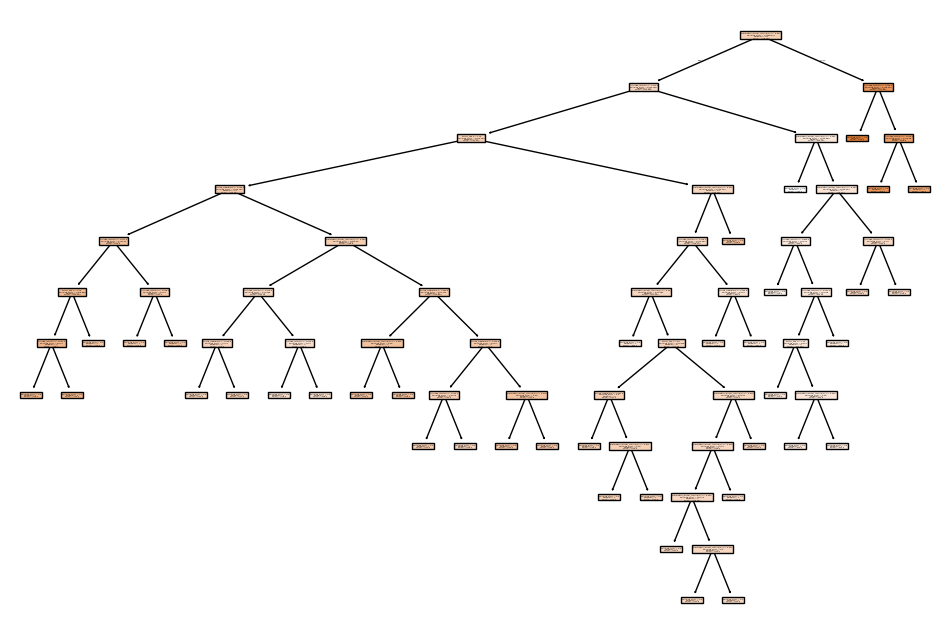

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
petrol_data = pd.read_csv("/content/petrol_consumption.csv")

# Split features and target
X = petrol_data.iloc[:, :-1]  # Features
y = petrol_data.iloc[:, -1]   # Target (Petrol Consumption)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Regression Tree model
regressor = DecisionTreeRegressor(criterion='squared_error', random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()
